In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from utils.predictiveNet import PredictiveNet
from utils.agent import RandomActionAgent
import itertools
import torch
import random
from utils.env import make_env
from utils.general import saveFig
from utils.figures import TrainingFigure
import matplotlib.pyplot as plt
from analysis.SpatialTuningAnalysis import SpatialTuningAnalysis
from analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis
from analysis.DiffusionReplayAnalysis import DiffusionReplayAnalysis



In [11]:
savefolder = 'Figures/S8_NSReplay/'

In [12]:
#Example Net
netname = 'AutoencoderPred_LN'
netfolder = '/Autoencoder_sparse_panel/'
exseed = 102
predictiveNet = PredictiveNet.loadNet(netfolder+netname+'-Onehot-s'+str(exseed))

Net Loaded from pathname


In [13]:
env = predictiveNet.EnvLibrary[0]
agentname = 'RandomActionAgent'
action_probability = np.array([0.15,0.15,0.6,0.1,0,0,0])
agent = RandomActionAgent(env.action_space,action_probability)
place_fields, SI, decoder = predictiveNet.calculateSpatialRepresentation(env,agent,
                                             trainDecoder=True)

Training Decoder on cuda...
loss: 5.828653 [    0\ 5000]
loss: 0.294350 [  500\ 5000]
loss: 0.158604 [ 1000\ 5000]
loss: 0.109751 [ 1500\ 5000]
loss: 0.083917 [ 2000\ 5000]
loss: 0.068552 [ 2500\ 5000]
loss: 0.055837 [ 3000\ 5000]
loss: 0.046758 [ 3500\ 5000]
loss: 0.039172 [ 4000\ 5000]
loss: 0.032640 [ 4500\ 5000]
loss: 0.029459 [ 4999\ 5000]
Training Complete. Back to the cpu


In [42]:
noisestd = 0.3
OTA = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=noisestd,
                               withIsomap=False, decoder=decoder, actionAgent=None,
                               compareWake=True,timesteps_wake = 5000)

Running SLEEP
Running WAKE


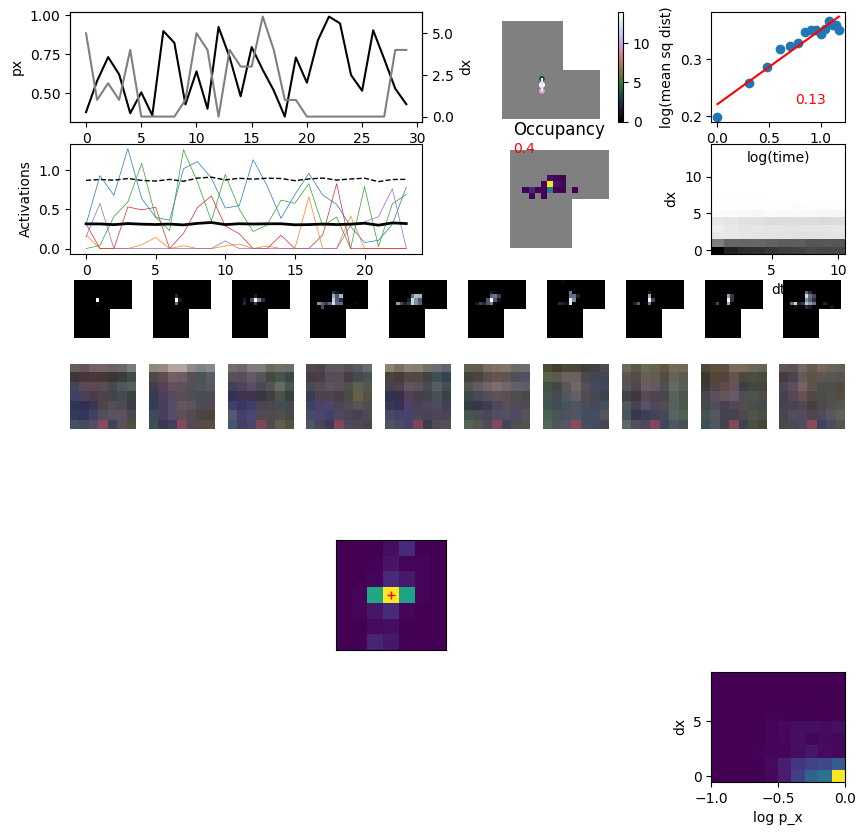

In [17]:
OTA.SpontTrajectoryFigure(netname,savefolder,trajRange = (110,125))

Running SLEEP


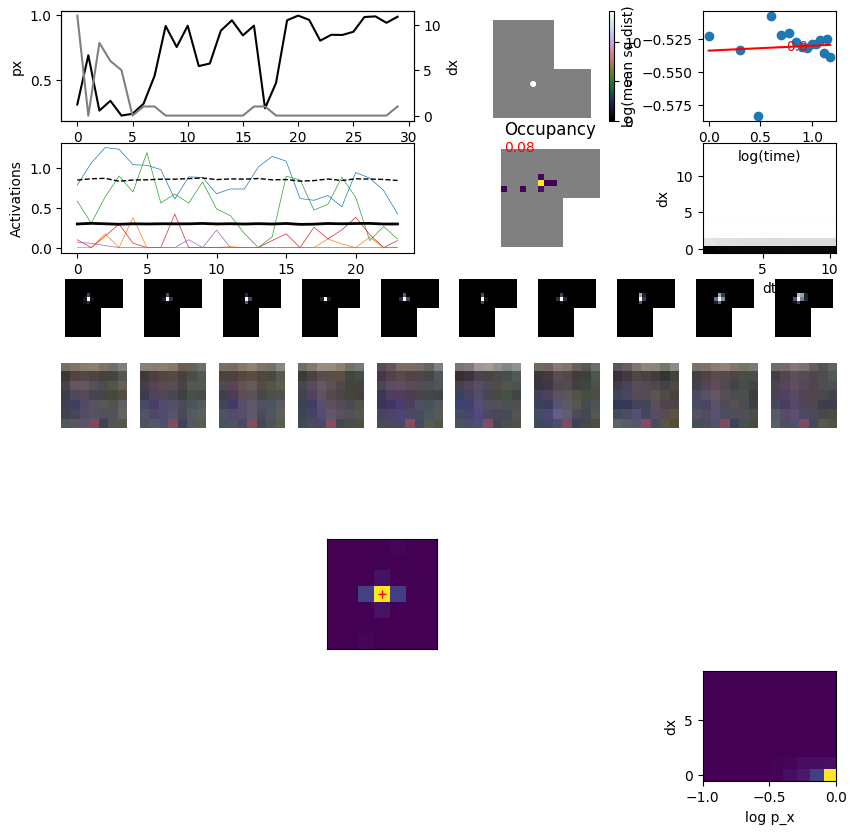

Running SLEEP


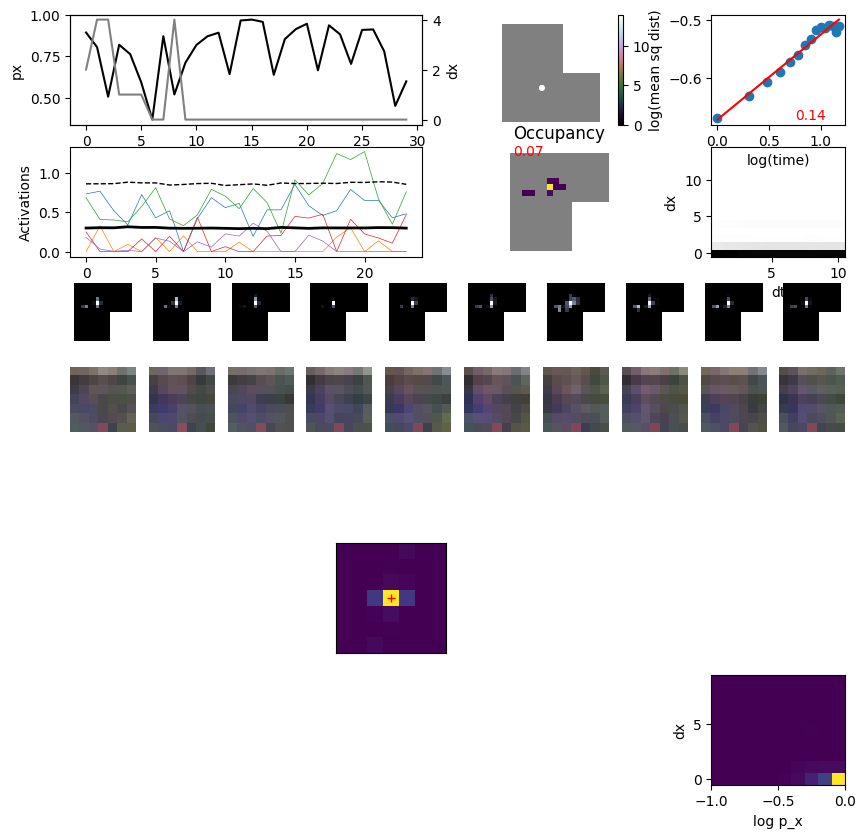

Running SLEEP


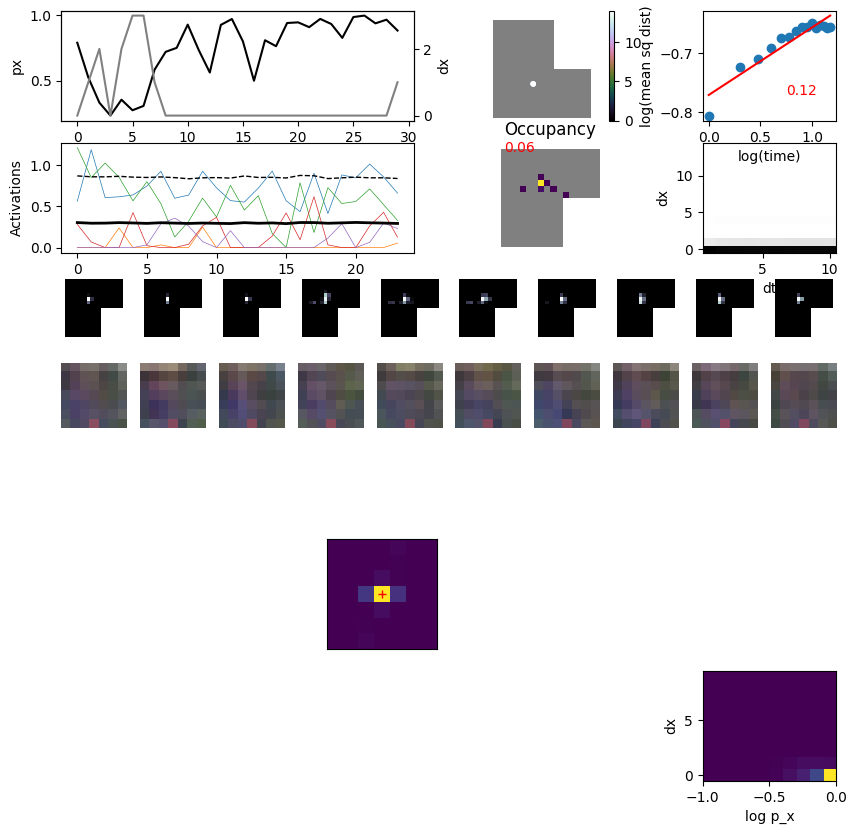

In [18]:
noisestd = 0.2
OTA = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=noisestd,
                               withIsomap=False, decoder=decoder, actionAgent=None,
                               compareWake=False,timesteps_wake = 5000)
OTA.SpontTrajectoryFigure(netname+'1',savefolder,trajRange = (110,125))
OTA = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=noisestd,
                               withIsomap=False, decoder=decoder, actionAgent=None,
                               compareWake=False,timesteps_wake = 5000)
OTA.SpontTrajectoryFigure(netname+'2',savefolder,trajRange = (110,125))
OTA = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=noisestd,
                               withIsomap=False, decoder=decoder, actionAgent=None,
                               compareWake=False,timesteps_wake = 5000)
OTA.SpontTrajectoryFigure(netname+'3',savefolder,trajRange = (110,125))

setting zero-values to min (0.01)
0
setting zero-values to min (0.01)
1
setting zero-values to min (0.01)
2
setting zero-values to min (0.01)
3
setting zero-values to min (0.01)
4
setting zero-values to min (0.01)
5
6
7
8
9


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/DiffusionReplayAnalysis.py:261: RuntimeWarning: divide by zero encountered in log10
  mean_msd_W = np.mean(np.log10(msd_wake),axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/DiffusionReplayAnalysis.py:262: RuntimeWarning: divide by zero encountered in log10
  std_msd_W = np.std(np.log10(msd_wake))
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mila/d

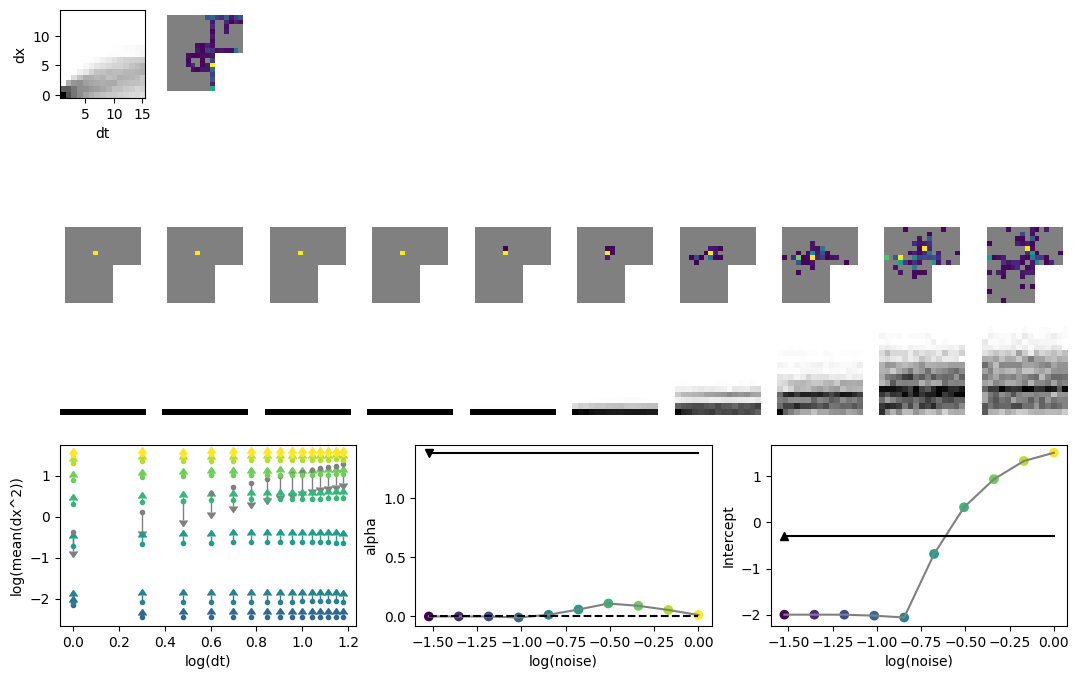

In [47]:
minStd = 0.03
numStds=10
DRA = DiffusionReplayAnalysis(predictiveNet, decoder = decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = 0.1)
DRA.runSTDPanel(minStd=minStd, numStds = numStds)


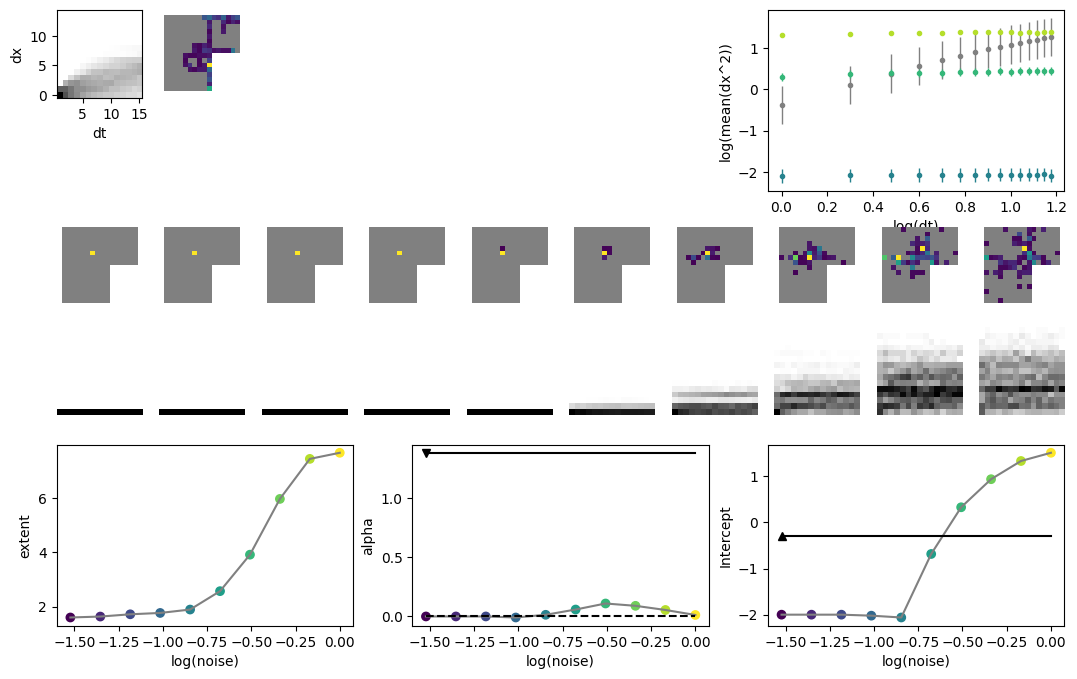

In [112]:
DRA.STDPanelFigure(netname,savefolder)

In [26]:
nettypes = ['AutoencoderPred_LN']
kvalues = ['2']
hpidx = ['0','1','2','3','4','5','6','7','8','9','10',
         '11','12','13','14','15','16','17','18','19',
        '20','21','22','23','24']
seeds = ['0','1','2','3','4','5','6','7','8','9']

netprops = itertools.product(*[nettypes,['-'],hpidx,['-s'],seeds])
netprops = list(netprops)
netnames = [''.join(name) for name in netprops]
nettype = [name[0] for name in netprops]
netk = [int(name[2]) for name in netprops]

netfolder = '/hyperparm_panel_sparse/'

analysisFrame_NS = pd.DataFrame(data={'filename':netnames, 'type':nettype, 'netfolder':netfolder})

In [27]:
#netfolder = '/hyperparm_panel_masked/'
def loadNet(row):
    netfolder = row.netfolder
    try:
        net = PredictiveNet.loadNet(netfolder+row['filename'],suppressText=True)
        return net
    except:
        print(f"{row['filename']} does not exist")
        #net = PredictiveNet
        

#analysisFrame_mask['net'] = analysisFrame_mask.apply(loadNet, axis = 1)
#analysisFrame_NS['net'] = analysisFrame_NS.apply(loadNet, axis = 1)

In [28]:
#analysisFrame['net'][0].trainArgs
def getTrainParms(row):
    #predictiveNet = row['net']
    predictiveNet = loadNet(row)
    lr = predictiveNet.trainArgs.lr
    seed = predictiveNet.trainArgs.seed
    weight_decay = predictiveNet.trainArgs.weight_decay
    bptttrunc = predictiveNet.trainArgs.bptttrunc
    seqdur = predictiveNet.trainArgs.seqdur
    dropp = predictiveNet.trainArgs.dropout
    ntimescale = predictiveNet.trainArgs.ntimescale
    nneurons = predictiveNet.trainArgs.hiddensize
    noisestd = predictiveNet.trainArgs.noisestd
    sparsity = predictiveNet.trainArgs.sparsity
    bias_lr = predictiveNet.trainArgs.bias_lr
    
    return lr,bptttrunc,seqdur,seed,dropp,ntimescale,weight_decay,nneurons,noisestd,sparsity,bias_lr
#analysisFrame_mask1[['lr','bptt','seqdur','seed','dropp','ntimescale','weight_decay',
#                    'nneurons','noisestd','sparsity','bias_lr']] = analysisFrame_mask1.apply(getTrainParms, axis = 1, result_type="expand")

analysisFrame_NS[['lr','bptt','seqdur','seed','dropp','ntimescale','weight_decay',
                  'nneurons','noisestd','sparsity','bias_lr']] = analysisFrame_NS.apply(getTrainParms, axis = 1, result_type="expand")

In [29]:
def getPredPerformance(row):
    #predictiveNet = row['net']
    predictiveNet = loadNet(row)
    try:
        finalLoss = predictiveNet.TrainingSaver['loss'].values[-1]
    except:
        try:
            finalLoss = predictiveNet.TrainingSaver['loss']
        except:
            finalLoss = predictiveNet.TrainingSaver.transpose()['loss']
        
    
    return finalLoss 

analysisFrame_NS['finalLoss'] = analysisFrame_NS.apply(getPredPerformance, axis = 1)

In [114]:
#Calculate spatial info and decoding performance
def getSpatialRep(row):
    predictiveNet = loadNet(row)
    #print(len(predictiveNet.TrainingSaver['sRSA'].values))
    numepochs = len(predictiveNet.TrainingSaver['sRSA'].values)
    try:
        SI = predictiveNet.TrainingSaver['SI'].values[-1]
        sRSA = predictiveNet.TrainingSaver['sRSA'].values[-1]

        EVs = predictiveNet.TrainingSaver['EVs'].values[-1]
        
        SWdist = predictiveNet.TrainingSaver['SWdist'].values[-1]
        finalLoss = predictiveNet.TrainingSaver['loss'].values[-1]
    except:
        try:
            SI = predictiveNet.TrainingSaver['SI']
            sRSA = predictiveNet.TrainingSaver['sRSA']

            EVs = predictiveNet.TrainingSaver['EVs']

            SWdist = predictiveNet.TrainingSaver['SWdist']
            finalLoss = predictiveNet.TrainingSaver['loss']
        except:
            SI = predictiveNet.TrainingSaver.transpose()['SI'].values[-1]
            sRSA = predictiveNet.TrainingSaver.transpose()['sRSA'].values[-1]

            EVs = predictiveNet.TrainingSaver.transpose()['EVs'].values[-1]

            SWdist = predictiveNet.TrainingSaver.transpose()['SWdist'].values[-1]
            finalLoss = predictiveNet.TrainingSaver.transpose()['loss'].values[-1]
    
    alphaN = predictiveNet.TrainingSaver['replay_alpha_noise'].values[-1]
    alphaQ = predictiveNet.TrainingSaver['replay_alpha_query'].values[-1]
    alphaA = predictiveNet.TrainingSaver['replay_alpha_adapt'].values[-1]

    intN = predictiveNet.TrainingSaver['replay_int_noise'].values[-1]
    intQ = predictiveNet.TrainingSaver['replay_int_query'].values[-1]
    intA = predictiveNet.TrainingSaver['replay_int_adapt'].values[-1]
    
    viewN = predictiveNet.TrainingSaver['replay_view_noise'].values[-1]
    viewQ = predictiveNet.TrainingSaver['replay_view_query'].values[-1]
    viewA = predictiveNet.TrainingSaver['replay_view_adapt'].values[-1]
    viewW = predictiveNet.TrainingSaver['replay_view_wake'].values[-1]
    
    cohereN = predictiveNet.TrainingSaver['replay_coherence_noise'].values[-1]
    cohereQ = predictiveNet.TrainingSaver['replay_coherence_query'].values[-1]
    cohereA = predictiveNet.TrainingSaver['replay_coherence_adapt'].values[-1]
    cohereW = predictiveNet.TrainingSaver['replay_coherence_wake'].values[-1]
    
    extentN = predictiveNet.TrainingSaver['replay_extent_noise'].values[-1]
    extentQ = predictiveNet.TrainingSaver['replay_extent_query'].values[-1]
    extentA = predictiveNet.TrainingSaver['replay_extent_adapt'].values[-1]
    extentW = predictiveNet.TrainingSaver['replay_extent_wake'].values[-1]
    
    meanSI = np.nanmean(SI)
    EVsp50 = np.nanmean(EVs>0.5)
    tunedSI = np.nanmean(SI[EVs>0.5])
    
    return (SI, meanSI, sRSA, EVs, EVsp50, finalLoss, SWdist, tunedSI, numepochs,
            alphaN, alphaQ, alphaA, 
            intN, intQ, intA,
            viewN, viewQ, viewA,
            cohereN, cohereQ, cohereA,
            extentN, extentQ, extentA,
           viewW,cohereW,extentW)
            
analysisFrame_NS[['SI','meanSI','sRSA','EVs','EVs50','finalLoss','SWdist','tunedSI','numepochs',
                 'alphaN', 'alphaQ', 'alphaA', 'intN', 'intQ', 'intA',
                 'viewN', 'viewQ', 'viewA', 'cohereN', 'cohereQ', 'cohereA',
            'extentN', 'extentQ', 'extentA',
                 'viewW','cohereW','extentW']] = analysisFrame_NS.apply(getSpatialRep, axis = 1, result_type="expand")


In [115]:
#Load Example Network
#Example Net
netname = 'AutoencoderPred_LN'
exseed = 102
netfolder = '/Autoencoder_sparse_panel/'
exampleNet = pd.DataFrame(index=[0], data={'filename':netname+'-Onehot-s'+str(exseed), 'type':netname, 'netfolder':netfolder})
#exampleNet['net'] = PredictiveNet.loadNet(netfolder+netname+'-Onehot-s'+str(exseed))
#exampleNet[['lr','bptt','seqdur','seed']] = exampleNet.apply(getTrainParms, axis = 1, result_type="expand")
exampleNet['finalLoss'] = exampleNet.apply(getPredPerformance, axis = 1)
exampleNet[['SI','meanSI','sRSA','EVs','EVs50','finalLoss','SWdist','tunedSI','numepochs',
                 'alphaN', 'alphaQ', 'alphaA', 'intN', 'intQ', 'intA',
                 'viewN', 'viewQ', 'viewA', 'cohereN', 'cohereQ', 'cohereA',
            'extentN', 'extentQ', 'extentA',
                 'viewW','cohereW','extentW']] = exampleNet.apply(getSpatialRep, axis = 1, result_type="expand")

exampleNet[['lr','bptt','seqdur','seed','dropp','ntimescale','weight_decay',
                  'nneurons','noisestd','sparsity','bias_lr']] = exampleNet.apply(getTrainParms, axis = 1, result_type="expand")


In [116]:
analysisFrame = analysisFrame_NS
netkind = "NS"

for frame in [analysisFrame,exampleNet]:
    frame['effectiveBptt'] = frame[['bptt','seqdur']].min(axis=1)
    frame['rec_weight_decay'] = frame['weight_decay']*frame['lr']
    frame['abs_rec_lr'] = frame['lr']*np.sqrt(1/frame['nneurons'])
    frame['abs_bias_lr'] =  frame['bias_lr']*frame['lr']
    frame['wrec_bias_lr'] =  frame['abs_bias_lr']/frame['abs_rec_lr']
    frame['10dropp']=10**frame['dropp']
    frame['10ntimescale']=10**frame['ntimescale']  
    frame['10sparsity']=10**frame['sparsity']  
                                        

In [119]:
exampleNet['viewW']

0    0.496244
Name: viewW, dtype: float64

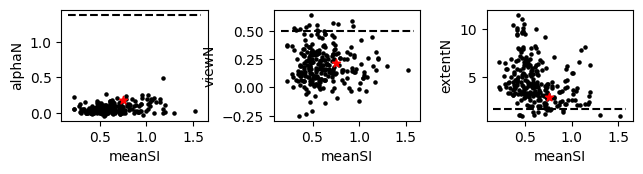

In [123]:
metrics = ['alphaN', 'intN', 'viewN', 'cohereN', 'extentN']
metricwakes = [DRA.diffusionFit_WAKE['alpha'],DRA.diffusionFit_WAKE['intercept'],
               exampleNet['viewW'].values,exampleNet['cohereW'].values,exampleNet['extentW'].values]

metrics = ['alphaN', 'viewN', 'extentN']
metricwakes = [DRA.diffusionFit_WAKE['alpha'],
               exampleNet['viewW'].values,exampleNet['extentW'].values]


plt.figure()

for midx,metric in enumerate(metrics):
    
    plt.subplot(3,3,midx+1)
    plt.scatter((analysisFrame['meanSI']),
                analysisFrame[metric],
                color='k',s=5)
    plt.scatter((exampleNet['meanSI']),exampleNet[metric],
                c='r',marker='*')
    plt.plot(plt.xlim(),np.ones(2)*metricwakes[midx],'k--')
               #c=np.log10(exampleNet[h]),marker='*')

    plt.xlabel('meanSI')
    plt.ylabel(metric)
    #plt.xlim([-4.1,-2.25])

plt.tight_layout()
saveFig(plt.gcf(),'HParmSweepSI'+metric,savefolder,
        filetype='pdf')

plt.show()